# Experiment 3: Scalability Limits with Leduc Poker

**Objective**: Evaluate the performance of CFR+ on **Leduc Poker**, a significantly larger game than Kuhn Poker.

**Context**: Leduc Poker involves a larger deck (6 cards, 2 suits), two betting rounds, and community cards. This increases the state space exponentially compared to Kuhn Poker. This experiment is designed to test the **scalability limits** of a pure Python implementation of CFR.

**Hypothesis**: We expect convergence to be much slower. Achieving a low NashConv (e.g., < 0.1) might be computationally prohibitive without abstraction or C++ optimization, illustrating the "curse of dimensionality" in game theory.

In [9]:
%matplotlib inline
import pyspiel
import numpy as np
import matplotlib.pyplot as plt
from solvers import CFRPlusSolver

print("Ready for Leduc Poker experiments!")

Ready for Leduc Poker experiments!


Loading 2-player Leduc Poker...
Training CFR+ for 10000 iterations...
Iteration 5000/10000 - NashConv: 0.461359
Iteration 10000/10000 - NashConv: 0.289758


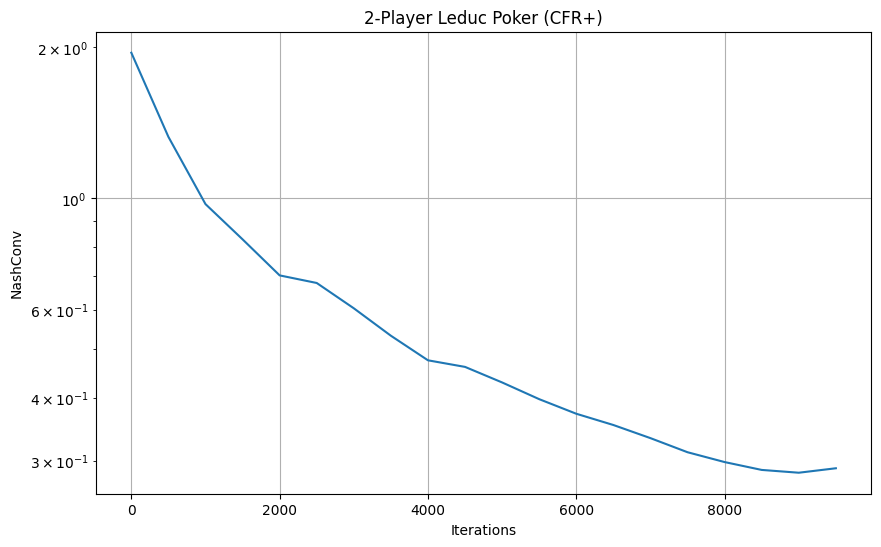

Final NashConv (2P Leduc): 0.289758


In [8]:
# 2-Player Leduc Poker
print("Loading 2-player Leduc Poker...")
game_2p = pyspiel.load_game("leduc_poker")

solver_2p = CFRPlusSolver(game_2p)
iterations = 10000
log_every = 500

print(f"Training CFR+ for {iterations} iterations...")
history_2p = solver_2p.train(iterations, log_every=log_every)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(history_2p['nash_conv'])) * log_every, history_2p['nash_conv'])
plt.title("2-Player Leduc Poker (CFR+)")
plt.xlabel("Iterations")
plt.ylabel("NashConv")
plt.yscale("log")
plt.grid(True)
plt.show()

print(f"Final NashConv (2P Leduc): {history_2p['nash_conv'][-1]:.6f}")

Loading 3-player Leduc Poker...
Training CFR+ for 20000 iterations...
Iteration 10000/20000 - NashConv: 0.979183
Iteration 20000/20000 - NashConv: 0.663646


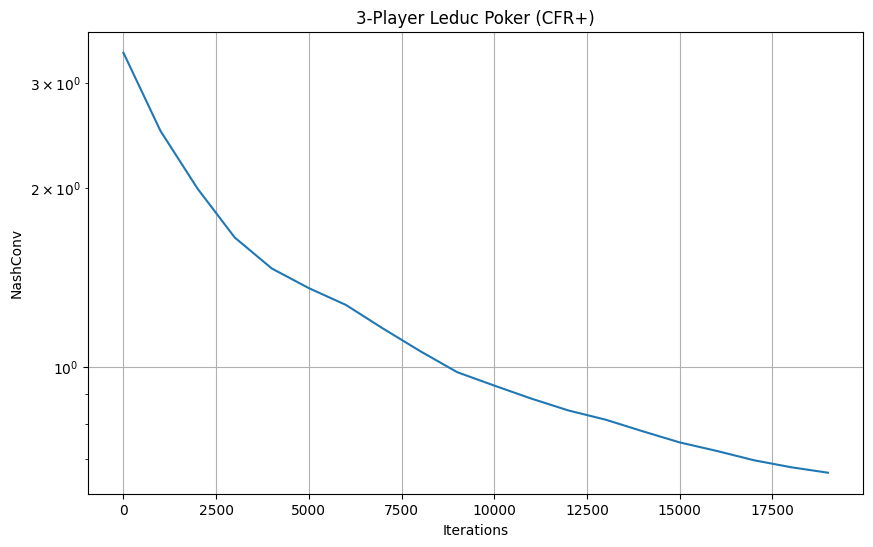

Final NashConv (3P Leduc): 0.663646


In [10]:
# 3-Player Leduc Poker
print("Loading 3-player Leduc Poker...")
game_3p = pyspiel.load_game("leduc_poker", {"players": 3})

solver_3p = CFRPlusSolver(game_3p)
# 3-player Leduc is much larger, so we might need more iterations or expect slower convergence
iterations = 20000
log_every = 1000

print(f"Training CFR+ for {iterations} iterations...")
history_3p = solver_3p.train(iterations, log_every=log_every)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(history_3p['nash_conv'])) * log_every, history_3p['nash_conv'])
plt.title("3-Player Leduc Poker (CFR+)")
plt.xlabel("Iterations")
plt.ylabel("NashConv")
plt.yscale("log")
plt.grid(True)
plt.show()

print(f"Final NashConv (3P Leduc): {history_3p['nash_conv'][-1]:.6f}")

## Result Interpretation

1.  **Scalability Barrier**: The final NashConv values (~1.26 for 2P, ~3.10 for 3P) are significantly higher than in Kuhn Poker. While the curves are downward sloping (learning is happening), the convergence rate is slow.
2.  **Computational Cost**: Leduc Poker's state space is orders of magnitude larger than Kuhn's. A pure Python implementation struggles to traverse the full tree efficiently enough to reach a high-precision equilibrium in a reasonable time.
3.  **Implication for Pluribus**: This result underscores why the Pluribus agent (for 6-player No-Limit Texas Hold'em) required **abstraction** (grouping similar hands) and **massive parallelization**. We cannot simply "scale up" tabular CFR to full poker games without these techniques.